In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1.  A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

  -   What is the probability that no cars drive up in the noon hour?
  
  
  -   What is the probability that 3 or more cars come through the drive through?
  
  
  -  How likely is it that the drive through gets at least 1 car?

In [70]:
# λ = average rate
λ=2
# create distributino object
car_dist=stats.poisson(λ)

In [3]:
car_dist

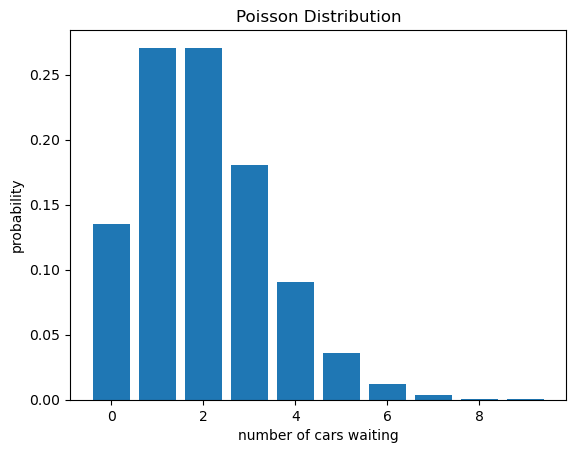

In [72]:
# plot it!
domain=np.arange(0,10)
# pmf is only for discrete distributions
car_range=[car_dist.pmf(n)for n in domain]
plt.bar(domain, car_range)
plt.title('Poisson Distribution')
plt.xlabel('number of cars waiting')
plt.ylabel('probability')
plt.show()

In [5]:
# What is the probability that no cars drive up in the noon hour?
# pmf for discrete distribution to find a single outcome
car_dist.pmf(0)

0.1353352832366127

In [6]:
# What is the probability that 3 or more cars come through the drive through?
''' 
sf for probability of our random variable falling above 3. 
3 or more means 2 is entered into function since sf is Exclusive
'''
car_dist.sf(2)

0.32332358381693654

In [74]:
# How likely is it that the drive through gets at least 1 car?
''' 
sf for probability of our random variable falling above 1. 
1 or more means 0 is entered into function since sf is Exclusive
'''

car_dist.sf(0)

0.8646647167633873

 ### 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

- What grade point average is required to be in the top 5% of the graduating class?
- What GPA constitutes the bottom 15% of the class?
- An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. - Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
- If I have a GPA of 3.5, what percentile am I in?


In [8]:
# define mean and std
μ=3
σ=.3

In [9]:
# create distributino object

grade_dist=stats.norm(μ,σ)

In [10]:
grade_dist

In [11]:
# - What grade point average is required to be in the top 5% of the graduating class?
'''
isf takes in a probability and outputs a value. 
isf is greater than a point
isf counts from the right of the curve, so if we want top 5 we enter .05
'''

grade_dist.isf(.05)

3.4934560880854417

In [73]:
# What GPA constitutes the bottom 15% of the class?
'''
ppf takes in a probability and outputs a value.
ppf counts from the left, isf counts from the right
ppf(.15) would be the same as isf(.85)
'''
print(grade_dist.isf(.85))
grade_dist.ppf(.15)

2.689069983151863


2.689069983151863

In [13]:
# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class.
# - Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this 
# scholarship?

print(grade_dist.ppf(.2))
grade_dist.ppf(.3)
# yes, 2.8 gpa qualifies.

2.7475136299281258


2.842679846187588

In [14]:
# If I have a GPA of 3.5, what percentile am I in?

round(grade_dist.cdf(3.5)*100,2)

95.22

 ### 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [15]:
# define n (number of trials) and p (probability of success)
n=4326
p= .02
click_dist=stats.binom(n,p)

In [16]:
# create distribution object
click_dist

In [17]:
# How likely is it that this many people or more click through(97)?
''' 
# x = 97 
# x is the number of successes in a trial (a click through is a success)
# sf(96) is used becuase we want probabilty of 97 or higher click throughs
'''
click_dist.sf(96)

0.13975823631416448

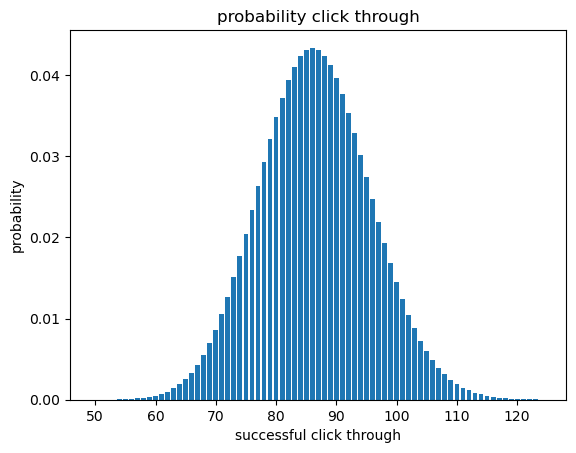

In [18]:
# plot it!
domain = np.arange(50, 125, 1)
click_range = [click_dist.pmf(n) for n in domain]
plt.bar(domain, click_range)
plt.title('probability click through')
plt.xlabel('successful click through')
plt.ylabel('probability')
plt.show()


 ### 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

 - What is the probability that at least one of your first 60 answers is correct?

In [19]:
# binomial (must define a success) correct answer is success. 
# there is .01 proability any one answer will be correct.
# n is number of trials
n=60
p= .01
homework_dist=stats.binom(n,p)

In [20]:
# create distribution object
homework_dist

In [21]:
# sf(0) since we want to know probability of getting at least 1 success or more
homework_dist.sf(0)

0.45284335760923855

### 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [22]:
# binomial - someone cleaned is success. there is .03 proability any one person cleans.
# number of trials is each person. there are 59.4 trials in a day (rounded down to closest whole person)
n=59
p= .03
clean_dist=stats.binom(n,p)

In [23]:
# create distribution object
clean_dist

In [77]:
# How likely is it that the break area gets cleaned up each day? 

# sf(0) since we want to know probability of getting at least 1 success or more
clean_dist.sf(0)

0.8342199288437352

In [78]:
# How likely is it that it goes two days without getting cleaned up? 
# n * 2 for twice the number of trials
two_days_dist=stats.binom(n*2,p)
# pmf because we want to know if there will be exactly 0 successes
two_days_dist.pmf(0)

0.02748303199257624

In [79]:
# All week?

week_dist=stats.binom(n*5,p)
# pmf because we want to know if there will be exactly 0 successes

week_dist.pmf(0)

0.00012521651388088851

In [80]:
# or, another way to think about it
each_day = clean_dist.sf(0)
print(each_day)

failure = 1 - each_day
print(failure)

two_days_failure = failure * failure
print(two_days_failure)

all_week_failure = failure ** 5
print(all_week_failure)

0.8342199288437352
0.1657800711562648
0.027483031992576224
0.00012521651388091348


 ### 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [27]:
μ=15*2 # 2 min for each person order
σ=3*2 # 2 min for each person order

lunch_dist=stats.norm(μ,σ)

# 60 min - 10 to wait and 15 to eat and 2 to order = 33
# cdf since we need to know if we have at least 15 min left
lunch_dist.cdf(33)


0.6914624612740131


 ### 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

 - a. What percent of employees earn less than 60,000?
 - b. What percent of employees earn more than 95,000?
 - c. What percent of employees earn between 65,000 and 80,000?
 - d. What do the top 5% of employees make?

In [31]:
import env
import pandas as pd

In [32]:
db = 'employees'

url = env.get_db_url(db)

In [33]:
# Use function to obtain a connection to the employees database.

pd.read_sql('select * from employees limit 5', url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [39]:
# assign df as pandas data frame
# we only want current employees
df= pd.read_sql('select * from salaries WHERE to_date > now()', url)

In [41]:
df.head(10)

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01
5,10006,59755,2001-08-02,9999-01-01
6,10007,88070,2002-02-07,9999-01-01
7,10009,94409,2002-02-14,9999-01-01
8,10010,80324,2001-11-23,9999-01-01
9,10012,54423,2001-12-16,9999-01-01


In [42]:
mean = np.round(df['salary'].mean(),2)
mean

72012.24

In [45]:
std= np.round(df['salary'].std(),2)
std

17310.0

In [46]:
salaries=stats.norm(mean,std)
salaries

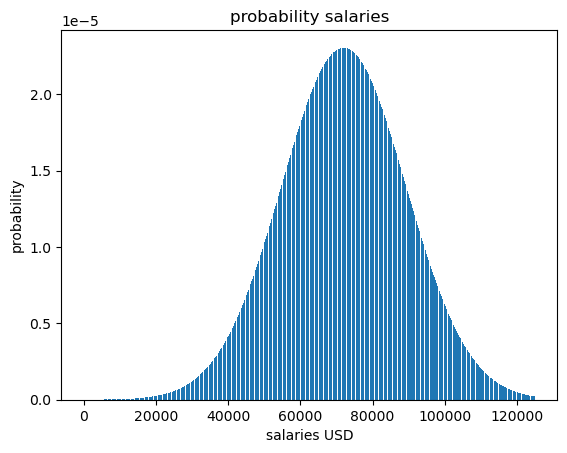

In [64]:
# plot it!
domain = np.arange(0, 125000, 1)
sal_range = [salaries.pdf(n) for n in domain]
plt.bar(domain, sal_range)
plt.title('probability salaries')
plt.xlabel('salaries USD')
plt.ylabel('probability')
plt.show()

In [62]:
# a. What percent of employees earn less than 60,000?

less_than_sixty=salaries.cdf(60_000)
np.round(less_than_sixty*100,2)



24.39

In [63]:
# What percent of employees earn more than 95,000?

more_than_ninefive=salaries.sf(95_000)
more_than_ninefive
np.round(more_than_ninefive*100,2)


9.21

In [69]:
# c. What percent of employees earn between 65,000 and 80,000?

more_than_sixtyfive=salaries.sf(65_000)
print(more_than_sixtyfive)

more_than_eightfive=salaries.sf(80_000)
print(more_than_eightfive)

difference = more_than_sixtyfive - more_than_eightfive
round(difference*100,2)

0.6572971262710092
0.32223663950740455


33.51

In [67]:
# d. What do the top 5% of employees make?
# top 5% can use isf since it counts from the right and isf takes in a probability
top_five=salaries.isf(.05)
round(top_five,2)

100484.66